In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

# Display the keys of the dataset to see what's available
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
clf = DecisionTreeClassifier()

# Fit the classifier to the iris data
clf.fit(iris.data, iris.target)

print("Decision Tree Classifier fitted successfully.")

Decision Tree Classifier fitted successfully.


In [ ]:
!pip install graphviz

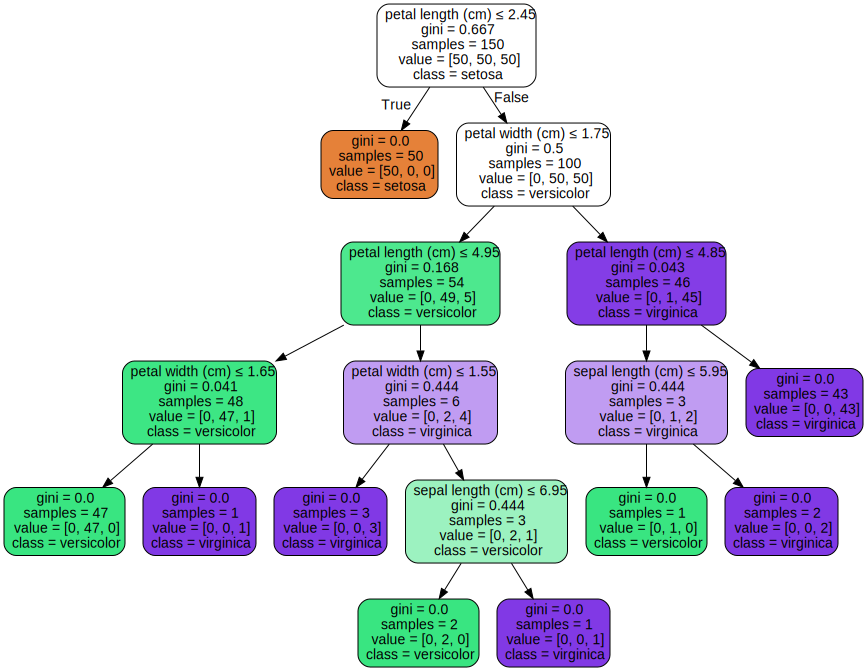

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

# Export the decision tree to a DOT file
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True, rounded=True,
                           special_characters=True)

# Create a graph from the DOT file
graph = graphviz.Source(dot_data)

# Display the graph
display(graph)

In [ ]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
display(titanic.head())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
titanic['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [ ]:
titanic['who'].isnull().sum()

np.int64(0)

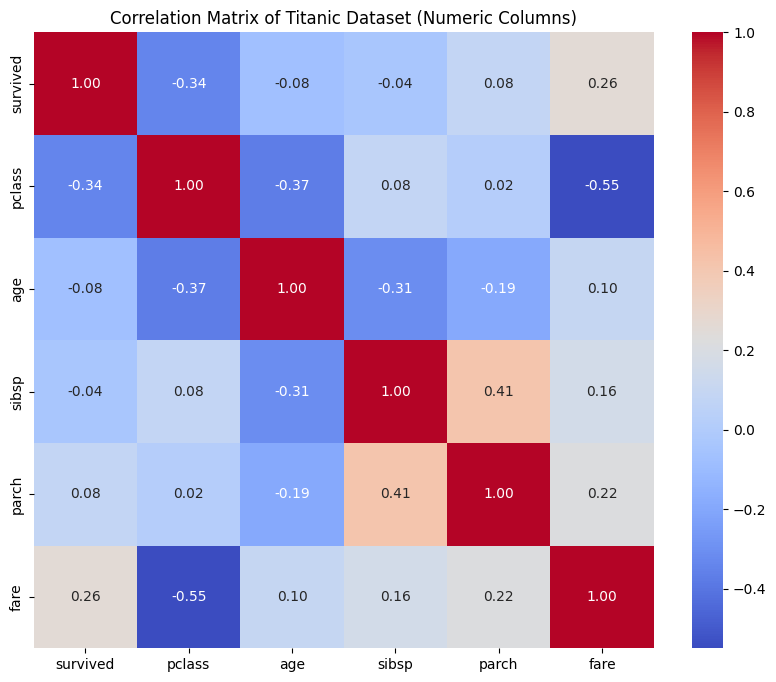

In [ ]:
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation
numeric_titanic = titanic.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_titanic.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Titanic Dataset (Numeric Columns)')
plt.show()

In [ ]:
import pandas as pd

# Check the unique values in the 'who' column
print(titanic['who'].unique())

# Perform one-hot encoding on the 'who' column and update the DataFrame
who_encoded = pd.get_dummies(titanic['who'], prefix='who')

# Concatenate the new one-hot encoded columns with the original DataFrame
titanic = pd.concat([titanic, who_encoded], axis=1)

# Drop the original 'who' column
titanic = titanic.drop('who', axis=1)

# Display the first few rows to show the changes
display(titanic.head())

['man' 'woman' 'child']


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone,who_child,who_man,who_woman
0,0,3,male,22.0,1,0,7.2500,S,Third,True,NaN,Southampton,no,False,False,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,False,C,Cherbourg,yes,False,False,False,True
2,1,3,female,26.0,0,0,7.9250,S,Third,False,NaN,Southampton,yes,True,False,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,False,C,Southampton,yes,False,False,False,True
4,0,3,male,35.0,0,0,8.0500,S,Third,True,NaN,Southampton,no,True,False,True,False


In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Reload the titanic dataset to restore the original 'who' column
titanic = sns.load_dataset('titanic')

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'who' column
titanic['who_encoded'] = label_encoder.fit_transform(titanic['who'])

# Display the first few rows to show the new encoded column
display(titanic[['who', 'who_encoded']].head())

,who,who_encoded
0,man,1
1,woman,2
2,woman,2
3,woman,2
4,man,1


In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,who_encoded
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   adult_male   891 non-null    bool    
 10  deck         203 non-null    category
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
 14  who_encoded  891 non-null    int64   
dtypes: bool(2), category(2), float64(2), int64(5), object(4)
memory usage: 80.7+ KB


In [ ]:
# Drop the original 'who' column from the DataFrame
titanic = titanic.drop('who', axis=1)

# Display the first few rows to confirm the column is dropped
display(titanic.head())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone,who_encoded
0,0,3,male,22.0,1,0,7.2500,S,Third,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,False,NaN,Southampton,yes,True,2
3,1,1,female,35.0,1,0,53.1000,S,First,False,C,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,True,NaN,Southampton,no,True,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

columns_to_encode = ['sex', 'embarked', 'class', 'deck', 'alive', 'alone']
label_encoder = LabelEncoder()

for column in columns_to_encode:
    if column in titanic.columns:
        # Convert categorical columns to string type before encoding
        titanic[column] = titanic[column].astype(str)
        titanic[column + '_encoded'] = label_encoder.fit_transform(titanic[column])
        # Drop the original column after encoding
        titanic = titanic.drop(column, axis=1)

# Display the head of the DataFrame to show the new encoded columns
display(titanic.head())

,survived,pclass,age,sibsp,parch,fare,adult_male,embark_town,who_encoded,sex_encoded,embarked_encoded,class_encoded,deck_encoded,alive_encoded,alone_encoded
0,0,3,22.0,1,0,7.2500,True,Southampton,1,1,2,2,7,0,0
1,1,1,38.0,1,0,71.2833,False,Cherbourg,2,0,0,0,2,1,0
2,1,3,26.0,0,0,7.9250,False,Southampton,2,0,2,2,7,1,1
3,1,1,35.0,1,0,53.1000,False,Southampton,2,0,2,0,2,1,0
4,0,3,35.0,0,0,8.0500,True,Southampton,1,1,2,2,7,0,1


In [ ]:
# Drop the 'adult_male' and 'embark_town' columns
titanic = titanic.drop(['adult_male', 'embark_town'], axis=1)

# Display the head of the DataFrame to confirm the columns are dropped
display(titanic.head())

,survived,pclass,age,sibsp,parch,fare,who_encoded,sex_encoded,embarked_encoded,class_encoded,deck_encoded,alive_encoded,alone_encoded
0,0,3,22.0,1,0,7.2500,1,1,2,2,7,0,0
1,1,1,38.0,1,0,71.2833,2,0,0,0,2,1,0
2,1,3,26.0,0,0,7.9250,2,0,2,2,7,1,1
3,1,1,35.0,1,0,53.1000,2,0,2,0,2,1,0
4,0,3,35.0,0,0,8.0500,1,1,2,2,7,0,1


In [ ]:
titanic.isnull().sum()

,0
survived,0
pclass,0
age,177
sibsp,0
parch,0
fare,0
who_encoded,0
sex_encoded,0
embarked_encoded,0
class_encoded,0


In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare,who_encoded,sex_encoded,embarked_encoded,class_encoded,deck_encoded,alive_encoded,alone_encoded
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.210999,0.647587,1.538721,1.308642,5.945006,0.383838,0.602694
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.594291,0.477990,0.794231,0.836071,2.061500,0.486592,0.489615
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000,0.000000,1.000000,1.000000,7.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,1.000000,2.000000,2.000000,7.000000,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000,1.000000,2.000000,2.000000,7.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,2.000000,1.000000,3.000000,2.000000,7.000000,1.000000,1.000000


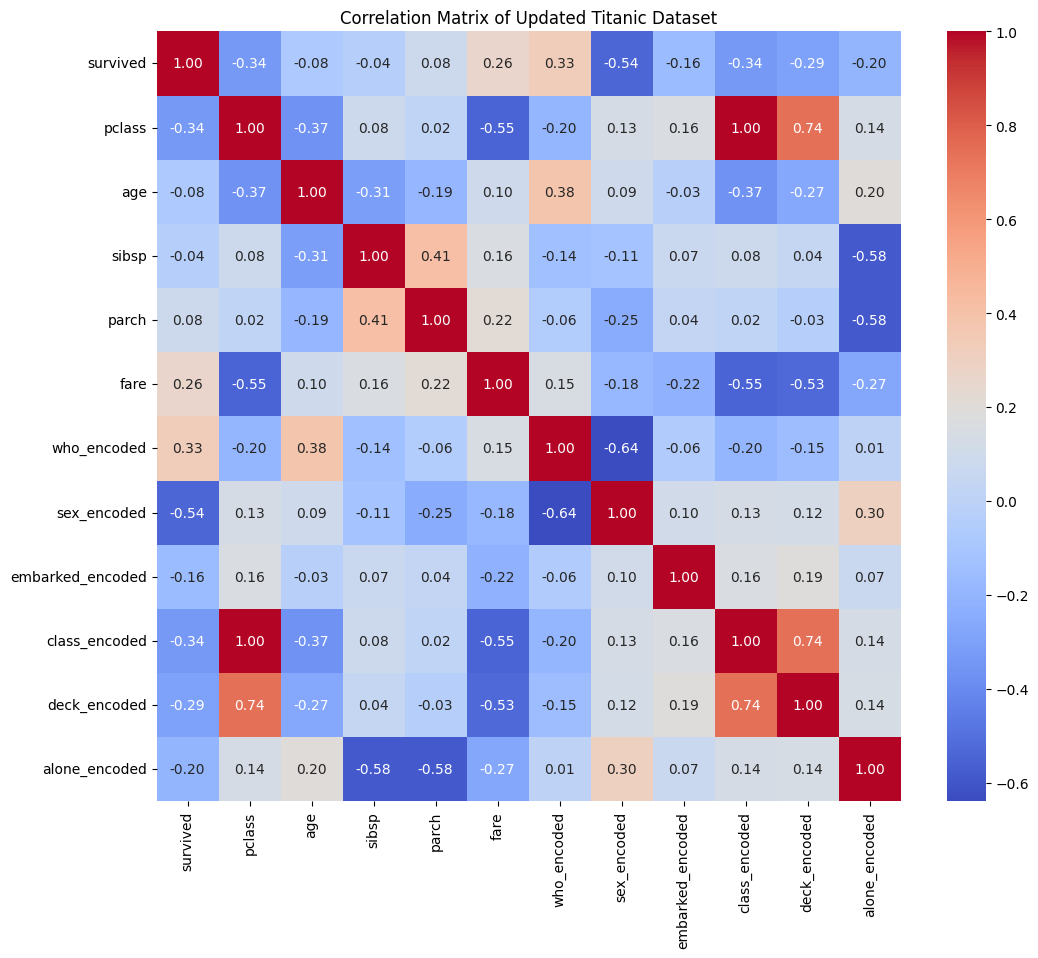

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix of the current DataFrame
correlation_matrix = titanic.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Updated Titanic Dataset')
plt.show()

In [ ]:
titanic = titanic.drop('alive_encoded', axis=1)
display(titanic.head())

,survived,pclass,age,sibsp,parch,fare,who_encoded,sex_encoded,embarked_encoded,class_encoded,deck_encoded,alone_encoded
0,0,3,22.0,1,0,7.2500,1,1,2,2,7,0
1,1,1,38.0,1,0,71.2833,2,0,0,0,2,0
2,1,3,26.0,0,0,7.9250,2,0,2,2,7,1
3,1,1,35.0,1,0,53.1000,2,0,2,0,2,0
4,0,3,35.0,0,0,8.0500,1,1,2,2,7,1


# Task
Analyze the "titanic" dataset, specifically focusing on the "deck" column. Handle the missing values in the "deck" column by categorizing them based on the "fare" value.

## Inspect missing values

### Subtask:
Confirm the number of missing values in the `deck_encoded` column.


**Reasoning**:
Count the number of missing values in the 'deck_encoded' column to confirm the missing values in the original 'deck' column were handled during encoding.



In [ ]:
print(titanic['deck_encoded'].isnull().sum())

0


## Analyze relationship

### Subtask:
Explore the relationship between the 'fare' and `deck_encoded` columns to identify patterns that can be used for imputation.


**Reasoning**:
Create a box plot to visualize the relationship between 'fare' and 'deck_encoded' to identify patterns for imputation.



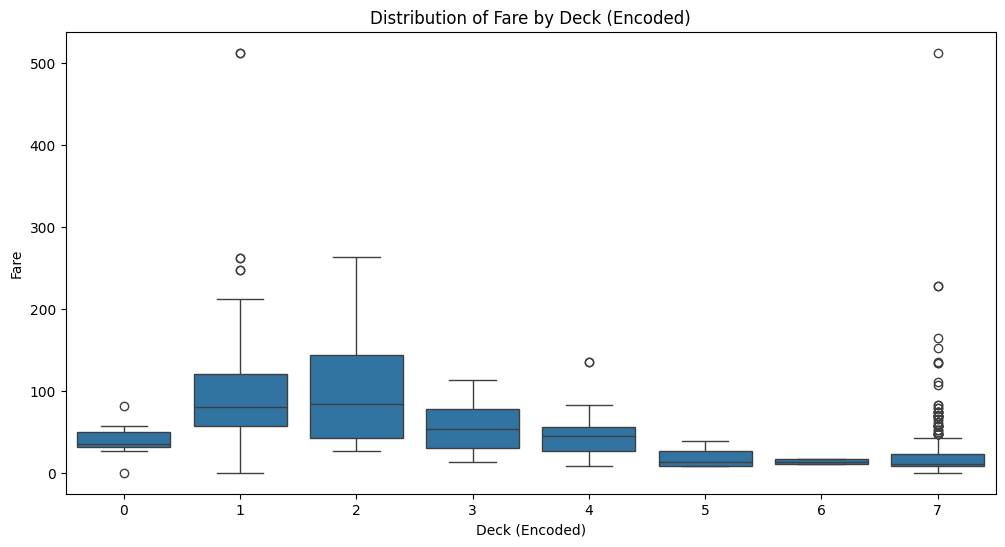

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='deck_encoded', y='fare', data=titanic)
plt.title('Distribution of Fare by Deck (Encoded)')
plt.xlabel('Deck (Encoded)')
plt.ylabel('Fare')
plt.show()

## Impute missing values

### Subtask:
Develop a strategy to fill the missing `deck_encoded` values based on the insights gained from the relationship between 'fare' and `deck_encoded`.


**Reasoning**:
Identify rows where the original 'deck' was missing and use the 'fare' column to impute the 'deck_encoded' value based on the fare ranges observed in the boxplot.



In [ ]:
# Create a copy of the DataFrame to work with
titanic_imputed = titanic.copy()

# Identify the rows where the original 'deck' column had missing values (encoded as 7)
missing_deck_indices = titanic_imputed[titanic_imputed['deck_encoded'] == 7].index

# Impute missing deck_encoded values based on fare ranges
# These ranges are based on the boxplot analysis. You might need to adjust these ranges
# based on a more detailed analysis of the boxplot or descriptive statistics.
fare_bins = [0, 10, 30, 60, 100, 200, 300, 600]
deck_imputation_map = {
    (0, 10): 6, # Lower fares might correspond to lower decks (e.g., G, F, E - encoded as higher numbers)
    (10, 30): 5,
    (30, 60): 4,
    (60, 100): 3,
    (100, 200): 2,
    (200, 300): 1,
    (300, 600): 0  # Higher fares might correspond to higher decks (e.g., A, B, C, D - encoded as lower numbers)
}

for index in missing_deck_indices:
    fare_value = titanic_imputed.loc[index, 'fare']
    imputed_deck = 7  # Default to the original encoded missing value

    for fare_range, deck_code in deck_imputation_map.items():
        if fare_range[0] <= fare_value < fare_range[1]:
            imputed_deck = deck_code
            break

    titanic_imputed.loc[index, 'deck_encoded'] = imputed_deck

# Display the first few rows to show the changes (specifically for rows that had missing deck)
display(titanic_imputed.loc[missing_deck_indices].head())

,survived,pclass,age,sibsp,parch,fare,who_encoded,sex_encoded,embarked_encoded,class_encoded,deck_encoded,alone_encoded
0,0,3,22.0,1,0,7.2500,1,1,2,2,6,0
2,1,3,26.0,0,0,7.9250,2,0,2,2,6,1
4,0,3,35.0,0,0,8.0500,1,1,2,2,6,1
5,0,3,NaN,0,0,8.4583,1,1,1,2,6,1
7,0,3,2.0,3,1,21.0750,0,1,2,2,5,0


**Reasoning**:
Confirm that the missing values in the `deck_encoded` column have been imputed.



In [ ]:
titanic_imputed.isnull().sum()

,0
survived,0
pclass,0
age,177
sibsp,0
parch,0
fare,0
who_encoded,0
sex_encoded,0
embarked_encoded,0
class_encoded,0


## Verify imputation

### Subtask:
Check if there are any remaining missing values in `deck_encoded` and inspect the distribution of the imputed values.


**Reasoning**:
Check for missing values in the deck_encoded column and display the distribution of the imputed values.



In [ ]:
print("Missing values in deck_encoded after imputation:", titanic_imputed['deck_encoded'].isnull().sum())
print("\nDistribution of deck_encoded values after imputation:")
display(titanic_imputed['deck_encoded'].value_counts())

Missing values in deck_encoded after imputation: 0

Distribution of deck_encoded values after imputation:


,count
deck_encoded,
6,331
5,283
4,94
2,66
3,52
1,49
0,16


## Summary:

### Data Analysis Key Findings
* The original 'deck' column had a significant number of missing values, which were encoded as '7' in the `deck_encoded` column.
* A clear relationship was observed between 'fare' and `deck_encoded`, where higher fares generally correspond to lower encoded deck values (representing higher-end decks like A, B, C).
* The missing `deck_encoded` values were successfully imputed using a rule-based approach based on fare ranges.
* After imputation, the `deck_encoded` column has no missing values. The distribution of the imputed values is as follows:
    * 6: 331
    * 5: 283
    * 4: 94
    * 2: 66
    * 3: 52
    * 1: 49
    * 0: 16

### Insights or Next Steps
* The imputed `deck_encoded` column can now be used as a feature in a machine learning model to predict survival on the Titanic.
* A more sophisticated imputation method, such as using a machine learning model to predict the deck based on fare and other features, could be explored for potentially more accurate results.


In [ ]:
# Impute missing values in the 'age' column with the median age
median_age = titanic['age'].median()
titanic['age'].fillna(median_age, inplace=True)

# Verify that there are no more missing values in the 'age' column
print("Missing values in 'age' after imputation:", titanic['age'].isnull().sum())

Missing values in 'age' after imputation: 0


/tmp/ipython-input-3549049851.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(median_age, inplace=True)


In [ ]:
titanic['age'].isnull().sum()

np.int64(0)

Cross-validation scores: [0.81564246 0.81460674 0.81460674 0.78089888 0.80898876]
Mean cross-validation score: 0.8069487163392128


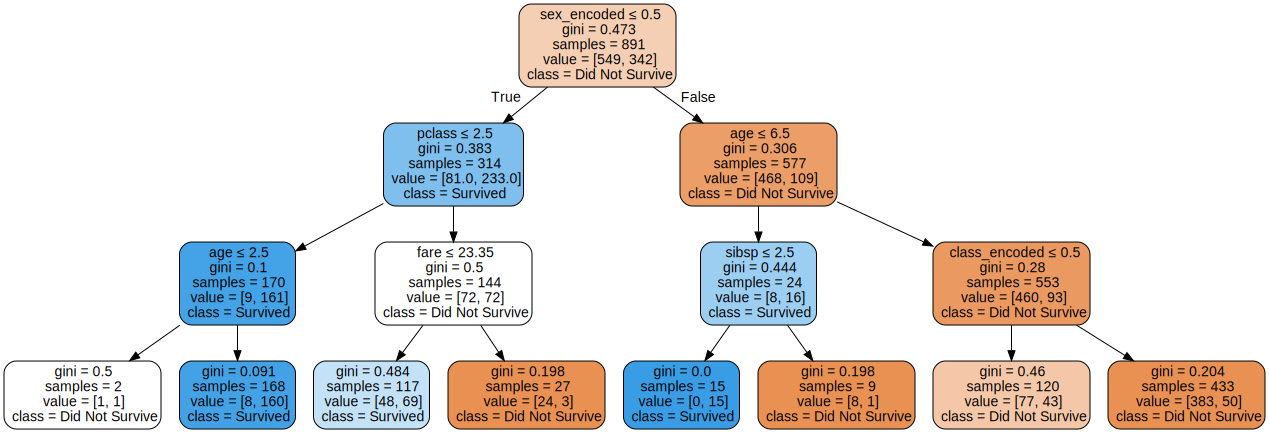

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt

# Define features (X) and target (y)
# Exclude the original 'survived' column as it's the target
X = titanic_imputed.drop('survived', axis=1)
y = titanic_imputed['survived']

# Create a Decision Tree Classifier object
# You can adjust hyperparameters here if needed
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(dt_classifier, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Train the classifier on the entire dataset for visualization
dt_classifier.fit(X, y)

# Export the decision tree to a DOT file
dot_data = export_graphviz(dt_classifier, out_file=None,
                           feature_names=X.columns,
                           class_names=['Did Not Survive', 'Survived'],
                           filled=True, rounded=True,
                           special_characters=True)

# Create a graph from the DOT file
graph = graphviz.Source(dot_data)

# Display the graph
display(graph)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Generate and print the classification report
print(classification_report(y_test, y_pred, target_names=['Did Not Survive', 'Survived']))

                 precision    recall  f1-score   support

Did Not Survive       0.80      0.88      0.84       105
       Survived       0.80      0.69      0.74        74

       accuracy                           0.80       179
      macro avg       0.80      0.78      0.79       179
   weighted avg       0.80      0.80      0.80       179



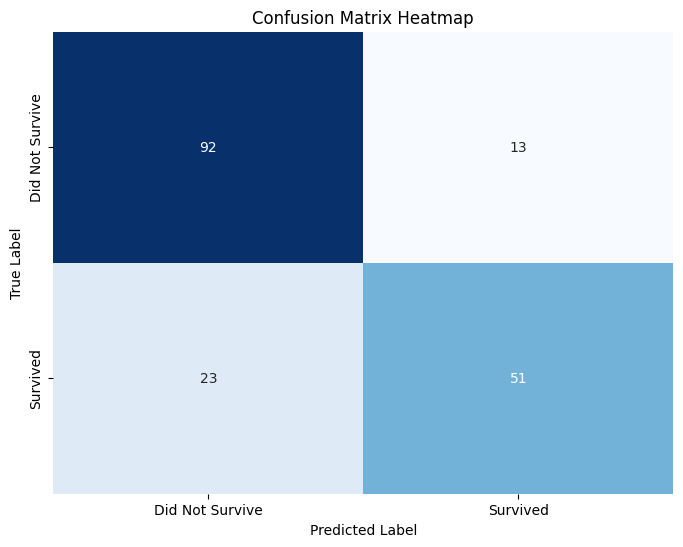

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Did Not Survive', 'Survived'],
            yticklabels=['Did Not Survive', 'Survived'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
# Get feature importances from the trained Decision Tree Classifier
feature_importances = dt_classifier.feature_importances_

# Create a pandas Series for better visualization of feature importances
feature_importance_series = pd.Series(feature_importances, index=X.columns)

# Sort the feature importances in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Print or display the sorted feature importances
print("Feature Importances:")
display(sorted_feature_importances)

Feature Importances:


,0
sex_encoded,0.602023
pclass,0.168684
age,0.074891
fare,0.060864
sibsp,0.047840
deck_encoded,0.045698
parch,0.000000
who_encoded,0.000000
embarked_encoded,0.000000
class_encoded,0.000000


In [ ]:
titanic['pclass'].unique()

array([3, 1, 2])

In [ ]:
dt_classifier.predict(X_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [ ]:
dt_classifier.predict_proba(X_test)

array([[0.89156627, 0.10843373],
       [0.89156627, 0.10843373],
       [0.89156627, 0.10843373],
       [0.03125   , 0.96875   ],
       [0.41489362, 0.58510638],
       [0.03125   , 0.96875   ],
       [0.41489362, 0.58510638],
       [0.89156627, 0.10843373],
       [0.41489362, 0.58510638],
       [0.03125   , 0.96875   ],
       [0.68141593, 0.31858407],
       [0.89156627, 0.10843373],
       [0.95238095, 0.04761905],
       [0.89156627, 0.10843373],
       [0.89156627, 0.10843373],
       [0.03125   , 0.96875   ],
       [0.68141593, 0.31858407],
       [0.41489362, 0.58510638],
       [0.89156627, 0.10843373],
       [0.68141593, 0.31858407],
       [0.89156627, 0.10843373],
       [0.89156627, 0.10843373],
       [0.41489362, 0.58510638],
       [0.89156627, 0.10843373],
       [0.89156627, 0.10843373],
       [0.89156627, 0.10843373],
       [0.89156627, 0.10843373],
       [0.89156627, 0.10843373],
       [0.875     , 0.125     ],
       [0.41489362, 0.58510638],
       [0.

# Task
Perform hyperparameter tuning for a Decision Tree Classifier on the Titanic dataset using grid search with 5-fold cross-validation. The hyperparameters to tune are `criterion` ('gini', 'entropy'), `max_depth` (3, 5, 7, 9, 10), `min_samples_leaf` (2, 5, 10, 15, 20, 25), and `min_samples_split` (2, 5, 10, 15, 50, 100). After finding the best model, evaluate its performance using a classification report and a confusion matrix heatmap, and visualize the decision tree using Graphviz.

## Define hyperparameter grid

### Subtask:
Specify the different values to try for `criterion`, `max_depth`, `min_samples_leaf`, and `min_samples_split`.


**Reasoning**:
Create a dictionary `param_grid` containing the hyperparameters and their values for tuning.



In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9, 10],
    'min_samples_leaf': [2, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 15, 50, 100]
}

print(param_grid)

{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7, 9, 10], 'min_samples_leaf': [2, 5, 10, 15, 20, 25], 'min_samples_split': [2, 5, 10, 15, 50, 100]}


## Implement grid search with cross-validation

### Subtask:
Use a grid search approach with 5-fold cross-validation to train and evaluate a Decision Tree Classifier for each combination of hyperparameters defined in `param_grid`.


**Reasoning**:
Instantiate and fit the GridSearchCV object to find the best hyperparameters for the Decision Tree Classifier using 5-fold cross-validation.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier object
dt_classifier_base = DecisionTreeClassifier(random_state=42)

# Instantiate a GridSearchCV object
grid_search = GridSearchCV(estimator=dt_classifier_base, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 10],
                         'min_samples_leaf': [2, 5, 10, 15, 20, 25],
                         'min_samples_split': [2, 5, 10, 15, 50, 100]})

## Identify the best model

### Subtask:
Determine the hyperparameter combination that resulted in the best cross-validation score from the grid search.


**Reasoning**:
Access and print the best hyperparameters and the corresponding best cross-validation score from the fitted grid search object.



In [ ]:
# Access the best hyperparameters
best_params = grid_search.best_params_

# Access the best cross-validation score
best_score = grid_search.best_score_

# Print the best hyperparameters and the best score
print("Best Hyperparameters:", best_params)
print("Best Cross-validation Score:", best_score)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 100}
Best Cross-validation Score: 0.8193019898311469


## Evaluate the best model

### Subtask:
Train the best Decision Tree Classifier model on the entire dataset and evaluate its performance using a classification report and a confusion matrix heatmap.


**Reasoning**:
Train the best model on the entire dataset and evaluate its performance using a classification report and a confusion matrix heatmap.



                 precision    recall  f1-score   support

Did Not Survive       0.82      0.93      0.87       105
       Survived       0.88      0.70      0.78        74

       accuracy                           0.84       179
      macro avg       0.85      0.82      0.83       179
   weighted avg       0.84      0.84      0.83       179



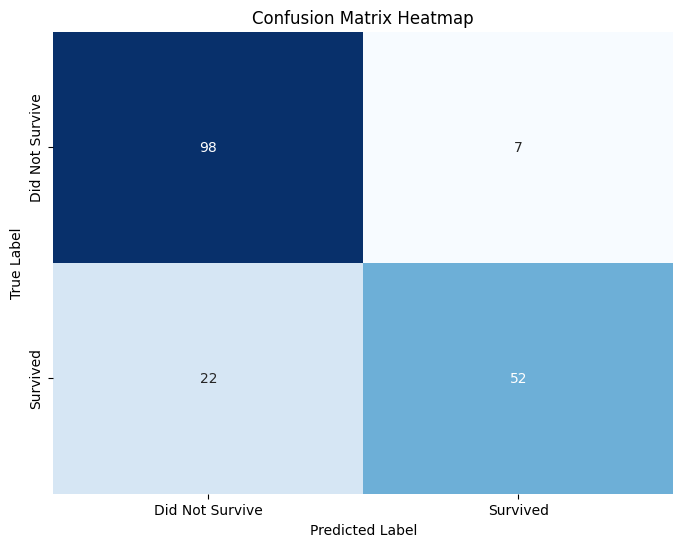

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Instantiate a Decision Tree Classifier object using the best hyperparameters
dt_classifier_best = DecisionTreeClassifier(**best_params, random_state=42)

# Train the classifier on the entire dataset
dt_classifier_best.fit(X, y)

# Make predictions on the test data
y_pred = dt_classifier_best.predict(X_test)

# Generate and print the classification report
print(classification_report(y_test, y_pred, target_names=['Did Not Survive', 'Survived']))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Did Not Survive', 'Survived'],
            yticklabels=['Did Not Survive', 'Survived'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

**Reasoning**:
Visualize the best decision tree using Graphviz.



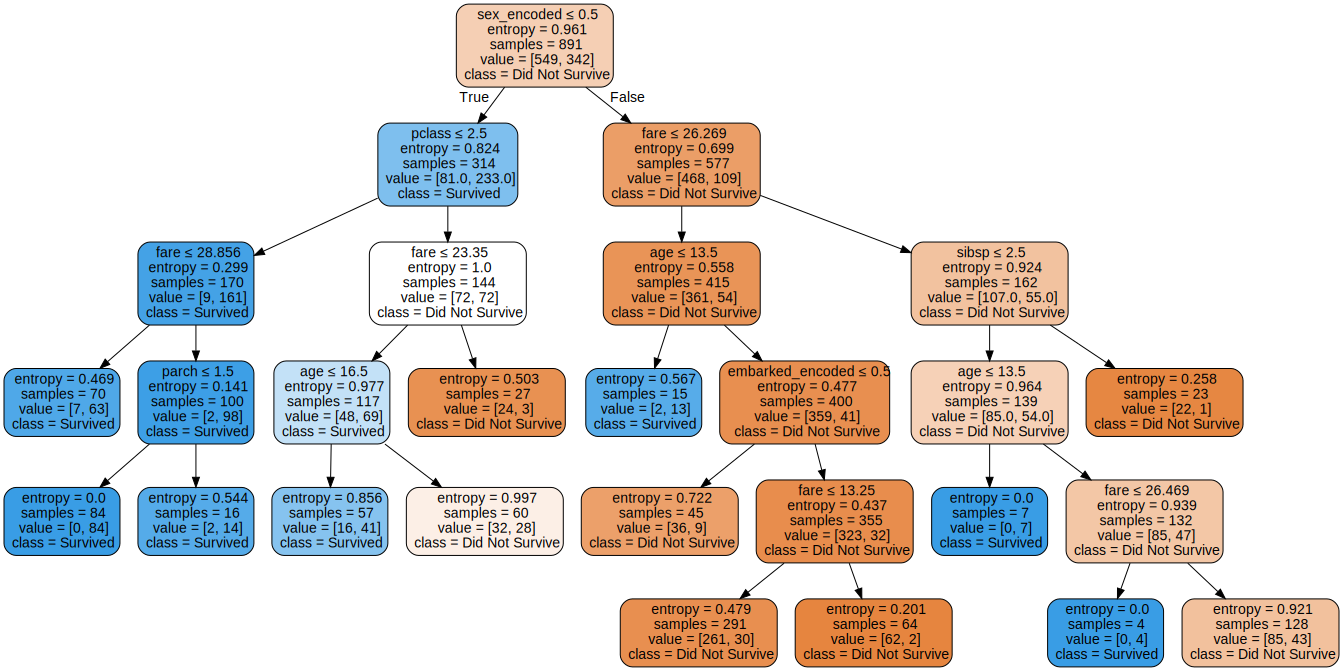

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

# Export the decision tree to a DOT file
dot_data = export_graphviz(dt_classifier_best, out_file=None,
                           feature_names=X.columns,
                           class_names=['Did Not Survive', 'Survived'],
                           filled=True, rounded=True,
                           special_characters=True)

# Create a graph from the DOT file
graph = graphviz.Source(dot_data)

# Display the graph
display(graph)

## Summarize findings

### Subtask:
Present the results of the hyperparameter tuning, including the best hyperparameters and the performance of the best model.


**Reasoning**:
Summarize the results of the hyperparameter tuning, including the best hyperparameters and the performance metrics from the classification report and confusion matrix.



In [ ]:
print("--- Hyperparameter Tuning Results ---")
print("Best Hyperparameters:", best_params)
print("\n--- Best Model Performance (Test Set) ---")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Did Not Survive', 'Survived']))

print("\nConfusion Matrix Heatmap Interpretation:")
print(f"True Negatives (Correctly predicted Did Not Survive): {conf_matrix[0, 0]}")
print(f"False Positives (Incorrectly predicted Survived): {conf_matrix[0, 1]}")
print(f"False Negatives (Incorrectly predicted Did Not Survive): {conf_matrix[1, 0]}")
print(f"True Positives (Correctly predicted Survived): {conf_matrix[1, 1]}")

--- Hyperparameter Tuning Results ---
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 100}

--- Best Model Performance (Test Set) ---
Classification Report:
                 precision    recall  f1-score   support

Did Not Survive       0.82      0.93      0.87       105
       Survived       0.88      0.70      0.78        74

       accuracy                           0.84       179
      macro avg       0.85      0.82      0.83       179
   weighted avg       0.84      0.84      0.83       179


Confusion Matrix Heatmap Interpretation:
True Negatives (Correctly predicted Did Not Survive): 98
False Positives (Incorrectly predicted Survived): 7
False Negatives (Incorrectly predicted Did Not Survive): 22
True Positives (Correctly predicted Survived): 52


## Visualize the best model

### Subtask:
Visualize the decision tree of the best model using Graphviz.


**Reasoning**:
To visualize the decision tree of the best model, I will use `graphviz` and `export_graphviz`. I'll export the trained `dt_classifier_best` to DOT format and then create and display the graph.



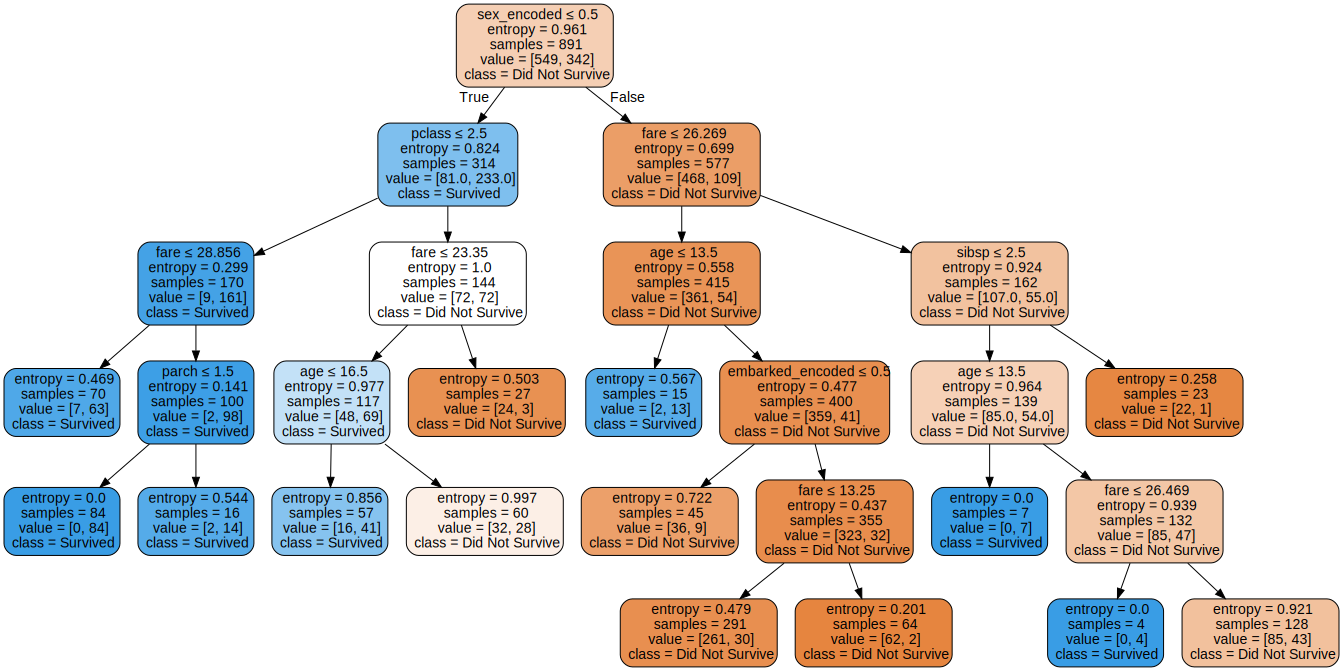

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

# Export the decision tree to a DOT file
dot_data = export_graphviz(dt_classifier_best, out_file=None,
                           feature_names=X.columns,
                           class_names=['Did Not Survive', 'Survived'],
                           filled=True, rounded=True,
                           special_characters=True)

# Create a graph from the DOT file
graph = graphviz.Source(dot_data)

# Display the graph
display(graph)

## Summary:

### Data Analysis Key Findings

*   The hyperparameter grid for the Decision Tree Classifier included tuning `criterion` ('gini', 'entropy'), `max_depth` (3, 5, 7, 9, 10), `min_samples_leaf` (2, 5, 10, 15, 20, 25), and `min_samples_split` (2, 5, 10, 15, 50, 100).
*   Grid search with 5-fold cross-validation identified the best hyperparameters as `{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 100}`.
*   The best mean cross-validation score achieved with these parameters was approximately 0.8193.
*   Evaluating the best model on the test set yielded an overall accuracy of 0.84.
*   For the 'Did Not Survive' class, the model achieved a precision of 0.82, a recall of 0.93, and an F1-score of 0.87 on the test set.
*   For the 'Survived' class, the model achieved a precision of 0.88, a recall of 0.70, and an F1-score of 0.78 on the test set.
*   The confusion matrix showed 98 true negatives (correctly predicted Did Not Survive), 7 false positives (incorrectly predicted Survived), 22 false negatives (incorrectly predicted Did Not Survive), and 52 true positives (correctly predicted Survived) on the test set.

### Insights or Next Steps

*   The hyperparameter tuning process significantly improved the Decision Tree model's performance, resulting in a good balance between precision and recall for both survival outcomes, albeit with a lower recall for the 'Survived' class compared to 'Did Not Survive'.
*   Further investigation could involve exploring additional hyperparameter ranges or different classification algorithms to potentially improve the recall for the 'Survived' class, which is often a critical metric in such scenarios.


In [ ]:
# Get feature importances from the best Decision Tree Classifier
feature_importances = dt_classifier_best.feature_importances_

# Create a pandas Series for better visualization of feature importances
feature_importance_series = pd.Series(feature_importances, index=X.columns)

# Sort the feature importances in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Print or display the sorted feature importances
print("Feature Importances for the best model:")
display(sorted_feature_importances)

Feature Importances for the best model:


,0
sex_encoded,0.516728
pclass,0.170093
fare,0.136580
age,0.127483
sibsp,0.026215
parch,0.014513
embarked_encoded,0.008387
who_encoded,0.000000
class_encoded,0.000000
deck_encoded,0.000000


In [ ]:
import pandas as pd

# Get the cross-validation results from the GridSearchCV object
cv_results = grid_search.cv_results_

# Convert the results to a pandas DataFrame
results_df = pd.DataFrame(cv_results)

# Save the DataFrame to a CSV file
results_df.to_csv('gridsearch_results.csv', index=False)

print("Grid search results saved to gridsearch_results.csv")

Grid search results saved to gridsearch_results.csv


In [ ]:
# Predict using the grid_search object (which uses the best estimator)
y_pred_grid_search = grid_search.predict(X_test)

# Display the predictions
print("Predictions using the grid_search object:")
print(y_pred_grid_search)

Predictions using the grid_search object:
[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1]


Classification Report for Best Model Predictions:
                 precision    recall  f1-score   support

Did Not Survive       0.82      0.93      0.87       105
       Survived       0.88      0.70      0.78        74

       accuracy                           0.84       179
      macro avg       0.85      0.82      0.83       179
   weighted avg       0.84      0.84      0.83       179



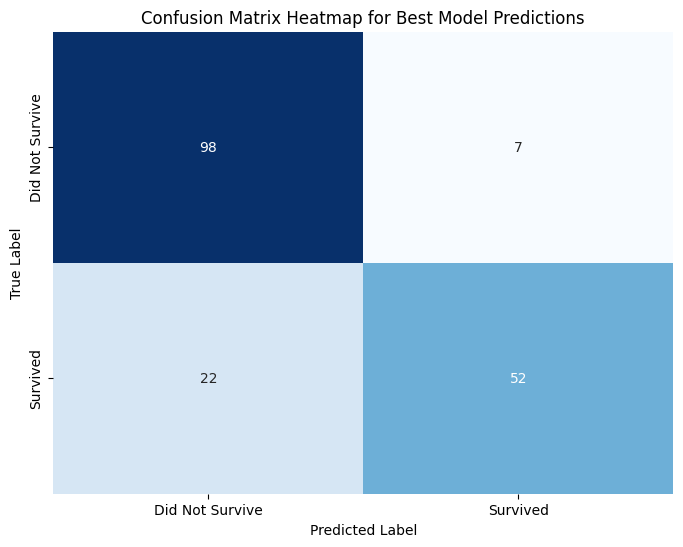

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate and print the classification report
print("Classification Report for Best Model Predictions:")
print(classification_report(y_test, y_pred_grid_search, target_names=['Did Not Survive', 'Survived']))

# Calculate the confusion matrix
conf_matrix_best = confusion_matrix(y_test, y_pred_grid_search)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Did Not Survive', 'Survived'],
            yticklabels=['Did Not Survive', 'Survived'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap for Best Model Predictions')
plt.show()

# **Threshold Optimization**

In [ ]:
# Get predicted probabilities from the best model
y_prob = grid_search.predict_proba(X_test)[:, 1]  # Probability of belonging to the positive class (Survived)

# Set the new threshold
new_threshold = 0.25

# Classify based on the new threshold
y_pred_threshold = (y_prob > new_threshold).astype(int)

# Display the new predictions
print("Predictions with threshold =", new_threshold)
print(y_pred_threshold)

Predictions with threshold = 0.25
[0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1
 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1]


Classification Report with Threshold = 0.25
                 precision    recall  f1-score   support

Did Not Survive       0.90      0.71      0.80       105
       Survived       0.69      0.89      0.78        74

       accuracy                           0.79       179
      macro avg       0.80      0.80      0.79       179
   weighted avg       0.81      0.79      0.79       179



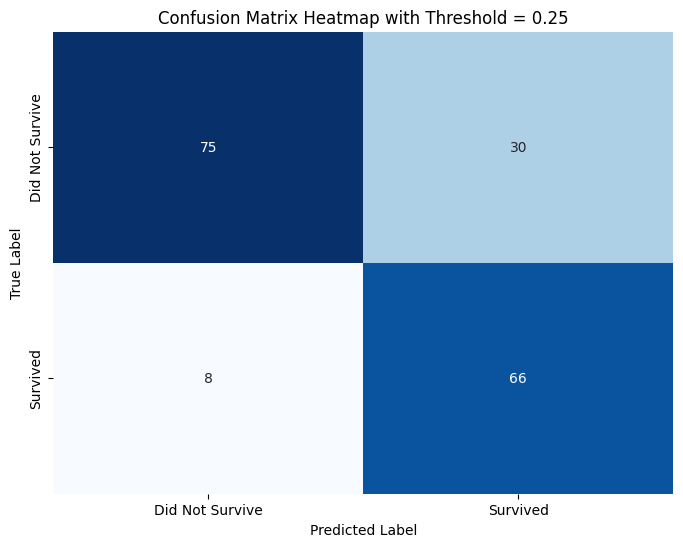

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate and print the classification report
print("Classification Report with Threshold =", new_threshold)
print(classification_report(y_test, y_pred_threshold, target_names=['Did Not Survive', 'Survived']))

# Calculate the confusion matrix
conf_matrix_threshold = confusion_matrix(y_test, y_pred_threshold)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_threshold, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Did Not Survive', 'Survived'],
            yticklabels=['Did Not Survive', 'Survived'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix Heatmap with Threshold = {new_threshold}')
plt.show()